<a href="https://colab.research.google.com/github/zoyayasin/HeartDiseasePrediction/blob/master/HeartDiseaseRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [184]:
input_data = pd.read_csv("/content/FinalDataClean(1).csv")
input_data.head()

,LocCode,LocID,Loc,Type,Topic,Age,Gender,Race,Val1,Val2,val3,Average,Diabetes,Obesity,Physical Inactivity,Smoking,18-24,25-44,35+,45-64,65+,75+,Female,Male,Hispanic,Non-Hispanic Asian,Non-Hispanic Black,Non-Hispanic White,Acute Myocardial Infarction (Heart Attack),Coronary Heart Disease,Major Cardiovascular Disease,Stroke
0,USM,58,Median of all states,Risk Factors,Diabetes,18-24,Female,Hispanic,1.2,9.85,11.45,7.500000,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,13.483333,2.166667,4.883333,2.083333
1,USM,58,Median of all states,Risk Factors,Diabetes,18-24,Female,Non-Hispanic Asian,1.2,9.85,8.10,6.383333,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,6.925000,1.650000,3.900000,1.450000
2,USM,58,Median of all states,Risk Factors,Diabetes,18-24,Female,Non-Hispanic Black,1.2,9.85,14.25,8.433333,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,14.066667,2.433333,5.733333,2.600000
3,USM,58,Median of all states,Risk Factors,Diabetes,18-24,Female,Non-Hispanic White,1.2,9.85,9.40,6.816667,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,14.958333,2.616667,5.416667,2.166667
4,USM,58,Median of all states,Risk Factors,Diabetes,18-24,Male,Hispanic,1.2,10.80,11.45,7.816667,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,14.783333,2.866667,5.850000,2.100000


In [185]:
#handling missing values
input_data = input_data.fillna(0)

In [186]:
#input feature selection
selected_features = ['LocID','Average','Diabetes','Obesity','Physical Inactivity','Smoking','18-24','25-44','35+','45-64','65+','75+','Female','Male','Hispanic','Non-Hispanic Asian','Non-Hispanic Black','Non-Hispanic White']
targets = ['Acute Myocardial Infarction (Heart Attack)','Coronary Heart Disease','Major Cardiovascular Disease','Stroke']
X = input_data[selected_features]
Y = input_data[targets]

In [187]:
from sklearn.model_selection import train_test_split

X_train = []
y_train = []
X_test = []
y_test = []

#split into training and testing data for all 4 targets
for i in range(len(targets)):
  X_tr,X_ts,y_tr,y_ts= train_test_split(X,Y.iloc[:,i],test_size=0.20,random_state=0)
  # X_tr_fs,X_ts_fs, fs = select_features_correlation(X_tr, y_tr, X_ts)
  # X_train.append(X_tr_fs)
  X_train.append(X_tr)
  y_train.append(y_tr)
  # X_test.append(X_ts_fs)
  X_test.append(X_ts)
  y_test.append(y_ts)

In [188]:
print(X_train[0])

      LocID    Average  ...  Non-Hispanic Black  Non-Hispanic White
6965     13  42.733333  ...                   0                   0
5258     18  34.008333  ...                   1                   0
6805     36  36.041667  ...                   0                   0
6554     37  14.866667  ...                   1                   0
7362     21  34.591667  ...                   1                   0
...     ...        ...  ...                 ...                 ...
9225     47  11.550000  ...                   0                   0
4859      1  33.308333  ...                   0                   1
3264     12   8.133333  ...                   0                   0
9845     56  39.000000  ...                   0                   0
2732      5  17.350000  ...                   0                   0

[7987 rows x 18 columns]


In [154]:
from sklearn.linear_model import LinearRegression

#array of models
model_list = []

#fit 4 linear regression models for the 4 targets
for idx in range(len(targets)):
  model = LinearRegression()
  model.fit(X_train[idx],y_train[idx])
  model_list.append(model)

In [137]:
from sklearn.linear_model import Lasso

#array of models
model_list = []

#fit 4 lasso regression models for the 4 targets
for idx in range(len(targets)):
  model = Lasso(alpha=0.5)
  model.fit(X_train[idx],y_train[idx])
  model_list.append(model)

In [155]:
from sklearn.linear_model import Ridge

#array of models
model_list = []

#fit 4 ridge regression models for the 4 targets
for idx in range(len(targets)):
  model = Ridge(alpha=0.05)
  model.fit(X_train[idx],y_train[idx])
  model_list.append(model)

In [156]:
#predictions
y_pred = []
for i, model in enumerate(model_list):
  y_pred.append(model.predict(X_test[i]))

In [157]:
#model validation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

for idx,target in enumerate(targets):
  print("MAE for %s model = %f"%(target,(mean_absolute_error(y_test[idx], y_pred[idx]))))
  print("MSE for %s model = %f"%(target,(mean_squared_error(y_test[idx], y_pred[idx]))))
  print("RMSE for %s model = %f"%(target,np.sqrt(mean_squared_error(y_test[idx], y_pred[idx]))))
  print("R2 score for %s model = %f\n"%(target,r2_score(y_test[idx], y_pred[idx])))

MAE for Acute Myocardial Infarction (Heart Attack) model = 5.985215
MSE for Acute Myocardial Infarction (Heart Attack) model = 55.459865
RMSE for Acute Myocardial Infarction (Heart Attack) model = 7.447138
R2 score for Acute Myocardial Infarction (Heart Attack) model = 0.113115

MAE for Coronary Heart Disease model = 1.221597
MSE for Coronary Heart Disease model = 3.545871
RMSE for Coronary Heart Disease model = 1.883048
R2 score for Coronary Heart Disease model = 0.548726

MAE for Major Cardiovascular Disease model = 1.970887
MSE for Major Cardiovascular Disease model = 7.140499
RMSE for Major Cardiovascular Disease model = 2.672171
R2 score for Major Cardiovascular Disease model = 0.646907

MAE for Stroke model = 0.795714
MSE for Stroke model = 1.021475
RMSE for Stroke model = 1.010681
R2 score for Stroke model = 0.648397



In [143]:
#baseline model
y_baseline_list = []
for i in range(len(targets)):
  y_baseline = np.array(np.mean(y_test[i]))
  ones_vector =  np.ones((y_test[0].shape[0],1))
  y_pred_baseline = np.multiply(y_baseline, ones_vector)
  y_baseline_list.append(y_pred_baseline)

In [144]:
#baseline model validation
for idx,target in enumerate(targets):
  print("MAE for %s model = %f"%(target,(mean_absolute_error(y_test[idx], y_baseline_list[i]))))
  print("MSE for %s model = %f"%(target,(mean_squared_error(y_test[idx], y_baseline_list[i]))))
  print("RMSE for %s model = %f"%(target,np.sqrt(mean_squared_error(y_test[idx], y_baseline_list[i]))))
  print("R2 score for %s model = %f\n"%(target,r2_score(y_test[idx], y_baseline_list[i])))

MAE for Acute Myocardial Infarction (Heart Attack) model = 6.886531
MSE for Acute Myocardial Infarction (Heart Attack) model = 104.598618
RMSE for Acute Myocardial Infarction (Heart Attack) model = 10.227347
R2 score for Acute Myocardial Infarction (Heart Attack) model = -0.672685

MAE for Coronary Heart Disease model = 2.358151
MSE for Coronary Heart Disease model = 10.754078
RMSE for Coronary Heart Disease model = 3.279341
R2 score for Coronary Heart Disease model = -0.368645

MAE for Major Cardiovascular Disease model = 7.133443
MSE for Major Cardiovascular Disease model = 70.958842
RMSE for Major Cardiovascular Disease model = 8.423707
R2 score for Major Cardiovascular Disease model = -2.508870

MAE for Stroke model = 1.421128
MSE for Stroke model = 2.905192
RMSE for Stroke model = 1.704462
R2 score for Stroke model = 0.000000



In [189]:
y1 = np.array(Y.iloc[:,0])
y2 = np.array(Y.iloc[:,1])
y3 = np.array(Y.iloc[:,2])
y4 = np.array(Y.iloc[:,3])

X = np.array(X)

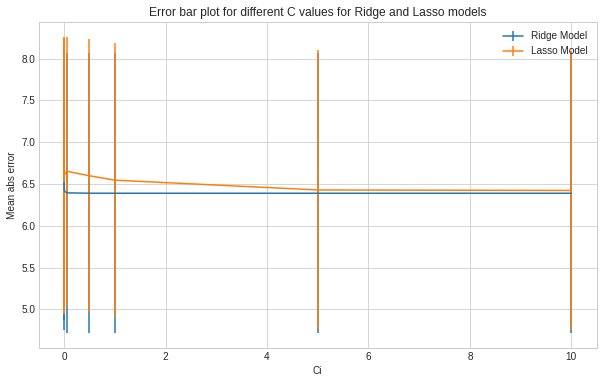

[6.517426467480751, 6.419924207404368, 6.394081090966588, 6.389887129699087, 6.389625894470524, 6.389416642597537, 6.389390537004129]
[6.59928630726492, 6.59928630726492, 6.652634142004243, 6.598755947428037, 6.546059366979408, 6.428928445996594, 6.423009699552554]


In [195]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

mean_error1=[]
std_error1=[] 
mean_error2=[]
std_error2=[] 
Ci_range = [0.0001, 0.0025, 0.05, 0.5, 1, 5, 10] 
for C in Ci_range: 
    model1 = Ridge(alpha=1/(2*C)) 
    model2 = Lasso(alpha=1/(2*C))
    temp1=[]
    temp2=[]  
    kf = KFold(n_splits=5) 
    for train, test in kf.split(X): 
        model1.fit(X[train], y1[train]) 
        model2.fit(X[train], y1[train])
        ypred1 = model1.predict(X[test]) 
        ypred2 = model2.predict(X[test]) 
        temp1.append(mean_absolute_error(y1[test],ypred1)) 
        temp2.append(mean_absolute_error(y1[test],ypred2)) 
    mean_error1.append(np.array(temp1).mean()) 
    std_error1.append(np.array(temp1).std()) 
    mean_error2.append(np.array(temp2).mean()) 
    std_error2.append(np.array(temp2).std())        
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(6)
plt.errorbar(Ci_range,mean_error1,yerr=std_error1, label = 'Ridge Model')
plt.errorbar(Ci_range,mean_error2,yerr=std_error2, label = 'Lasso Model') 
plt.xlabel('Ci') 
plt.ylabel('Mean abs error') 
plt.legend()
plt.title("Error bar plot for different C values for Ridge and Lasso models")
plt.show()
print(mean_error1)
print(mean_error2)

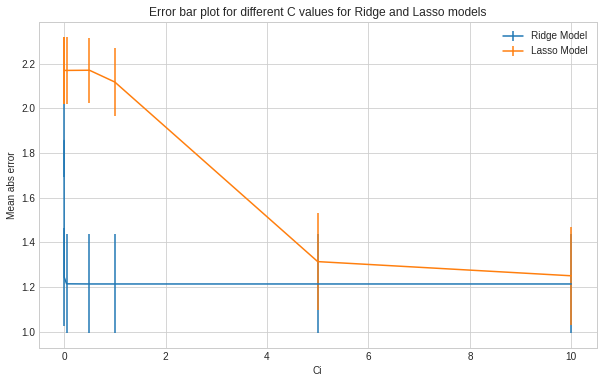

[1.8559126007324156, 1.2433846473693766, 1.2137533865101902, 1.2131396053514218, 1.2131217754434074, 1.213108924851099, 1.213107529257314]
[2.1701736401597413, 2.1701736401597413, 2.1701736401597413, 2.170996835327974, 2.118206042964599, 1.3133273847261258, 1.2497998811382034]


In [196]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

mean_error1=[]
std_error1=[] 
mean_error2=[]
std_error2=[] 
Ci_range = [0.0001, 0.0025, 0.05, 0.5, 1, 5, 10] 
for C in Ci_range: 
    model1 = Ridge(alpha=1/(2*C)) 
    model2 = Lasso(alpha=1/(2*C))
    temp1=[]
    temp2=[]  
    kf = KFold(n_splits=5) 
    for train, test in kf.split(X): 
        model1.fit(X[train], y2[train]) 
        model2.fit(X[train], y2[train])
        ypred1 = model1.predict(X[test]) 
        ypred2 = model2.predict(X[test]) 
        temp1.append(mean_absolute_error(y2[test],ypred1)) 
        temp2.append(mean_absolute_error(y2[test],ypred2)) 
    mean_error1.append(np.array(temp1).mean()) 
    std_error1.append(np.array(temp1).std()) 
    mean_error2.append(np.array(temp2).mean()) 
    std_error2.append(np.array(temp2).std())        
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(6)
plt.errorbar(Ci_range,mean_error1,yerr=std_error1, label = 'Ridge Model')
plt.errorbar(Ci_range,mean_error2,yerr=std_error2, label = 'Lasso Model') 
plt.xlabel('Ci') 
plt.ylabel('Mean abs error') 
plt.legend()
plt.title("Error bar plot for different C values for Ridge and Lasso models")
plt.show()
print(mean_error1)
print(mean_error2)

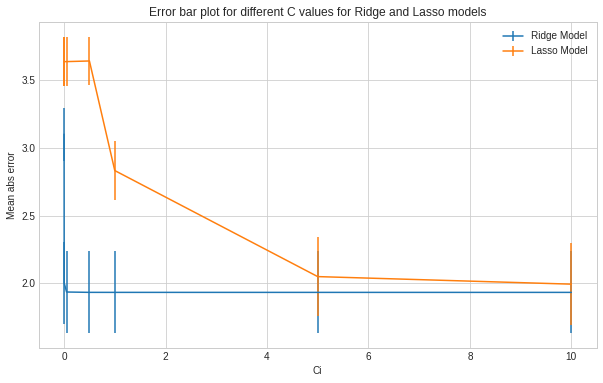

[1.1981198155630495, 0.8100328270448172, 0.7917277685123246, 0.7912542939393565, 0.7912336924380232, 0.7912171849210223, 0.7912151260481322]
[3.100218860005245, 2.0024403004894458, 1.9356722766278114, 1.9331843391855599, 1.9330675095682317, 1.932976758969516, 1.9329655911188435]
[3.6357467540765818, 3.6357467540765818, 3.6357467540765818, 3.640397753277052, 2.8317929266501674, 2.049440241758446, 1.9937086274853564]


In [197]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

mean_error1=[]
std_error1=[] 
mean_error2=[]
std_error2=[] 
Ci_range = [0.0001, 0.0025, 0.05, 0.5, 1, 5, 10] 
for C in Ci_range: 
    model1 = Ridge(alpha=1/(2*C)) 
    model2 = Lasso(alpha=1/(2*C))
    temp1=[]
    temp2=[]  
    kf = KFold(n_splits=5) 
    for train, test in kf.split(X): 
        model1.fit(X[train], y3[train]) 
        model2.fit(X[train], y3[train])
        ypred1 = model1.predict(X[test]) 
        ypred2 = model2.predict(X[test]) 
        temp1.append(mean_absolute_error(y3[test],ypred1)) 
        temp2.append(mean_absolute_error(y3[test],ypred2)) 
    mean_error1.append(np.array(temp1).mean()) 
    std_error1.append(np.array(temp1).std()) 
    mean_error2.append(np.array(temp2).mean()) 
    std_error2.append(np.array(temp2).std())        
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(6)
plt.errorbar(Ci_range,mean_error1,yerr=std_error1, label = 'Ridge Model')
plt.errorbar(Ci_range,mean_error2,yerr=std_error2, label = 'Lasso Model') 
plt.xlabel('Ci') 
plt.ylabel('Mean abs error') 
plt.legend()
plt.title("Error bar plot for different C values for Ridge and Lasso models")
plt.show()
print(mean_error)
print(mean_error1)
print(mean_error2)

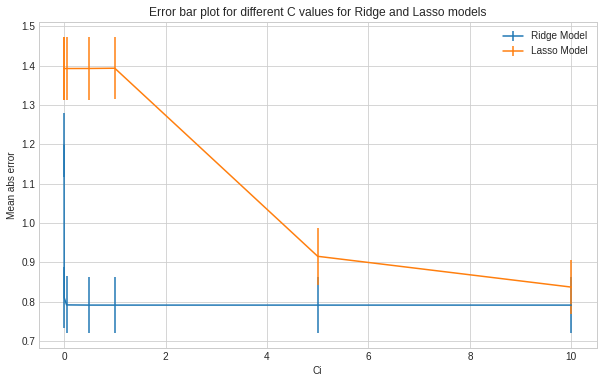

[1.1981198155630495, 0.8100328270448172, 0.7917277685123246, 0.7912542939393565, 0.7912336924380232, 0.7912171849210223, 0.7912151260481322]


In [194]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

mean_error1=[]
std_error1=[] 
mean_error2=[]
std_error2=[] 
Ci_range = [0.0001, 0.0025, 0.05, 0.5, 1, 5, 10] 
for C in Ci_range: 
    model1 = Ridge(alpha=1/(2*C)) 
    model2 = Lasso(alpha=1/(2*C))
    temp1=[]
    temp2=[]  
    kf = KFold(n_splits=5) 
    for train, test in kf.split(X): 
        model1.fit(X[train], y4[train]) 
        model2.fit(X[train], y4[train])
        ypred1 = model1.predict(X[test]) 
        ypred2 = model2.predict(X[test]) 
        temp1.append(mean_absolute_error(y4[test],ypred1)) 
        temp2.append(mean_absolute_error(y4[test],ypred2)) 
    mean_error1.append(np.array(temp1).mean()) 
    std_error1.append(np.array(temp1).std()) 
    mean_error2.append(np.array(temp2).mean()) 
    std_error2.append(np.array(temp2).std())        
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(6)
plt.errorbar(Ci_range,mean_error1,yerr=std_error1, label = 'Ridge Model')
plt.errorbar(Ci_range,mean_error2,yerr=std_error2, label = 'Lasso Model') 
plt.xlabel('Ci') 
plt.ylabel('Mean abs error') 
plt.legend()
plt.title("Error bar plot for different C values for Ridge and Lasso models")
plt.show()
print(mean_error)